# k means algorithm with Python

In [6]:
import numpy as np
x = np.random.randint(0,48,size=3)
y = np.random.randint(0,89,size=3)
z = np.array(list(zip(x,y)),dtype=np.float32)
print(z)

[[11. 78.]
 [16. 72.]
 [23. 41.]]


## 1. K_means algorithms with scikit-learn

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
%matplotlib inline

* pandas for reading and writing spreadsheets
* Numpy for carrying out efficient computations
* Matplotlib for visualization of data

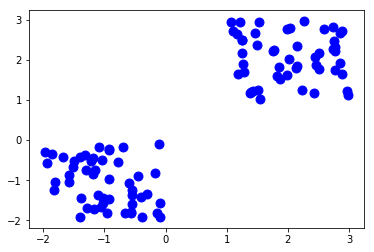

In [8]:
X = -2*np.random.rand(100,2)
X1 = 1+2*np.random.rand(50,2)
X[50:100,:] = X1
plt.scatter(X[:,0],X[:,1],s=80,c='b')
plt.show()

### Using Scikit-Learn

In [11]:
Kmeans = KMeans(n_clusters=2)
Kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Finding the centroid

In [14]:
center_points=Kmeans.cluster_centers_

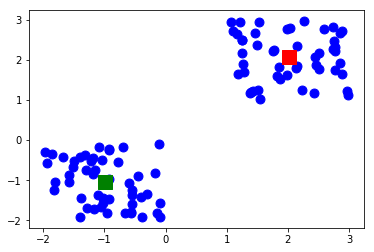

In [15]:
plt.scatter(X[:,0],X[:,1],s=80,c='b')
plt.scatter(center_points[0,0],center_points[0,1],s=200,c='g',marker='s')
plt.scatter(center_points[1,0],center_points[1,1],s=200,c='r',marker='s')
plt.show()

### Testing the algorithm

In [16]:
Kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
sample_test = np.array([-3.0,-3.0])
second_test = sample_test.reshape(1,-1)
Kmeans.predict(second_test)

array([0])

## K_means algorithm with Python

In [19]:
from copy import deepcopy

data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


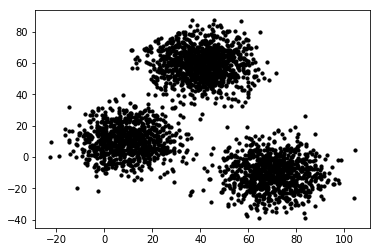

In [20]:
value1 = data['V1'].values
value2 = data['V2'].values
X = np.array(list(zip(value1,value2)))
plt.scatter(value1,value2,c='black',s=10)
plt.show()

### Eulidean Distance Calculatior

In [21]:
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [22]:
# Number of clusters
k = 3
# X corrdinates of random centroids
C_x = np.random.randint(0,np.max(X)-20,size=k)
# Y corrdinates of random centroids
C_y = np.random.randint(0,np.max(X)-20,size=k)
C = np.array(list(zip(C_x,C_y)),dtype=np.float32)
print(C)

[[18.  5.]
 [32. 51.]
 [21. 12.]]


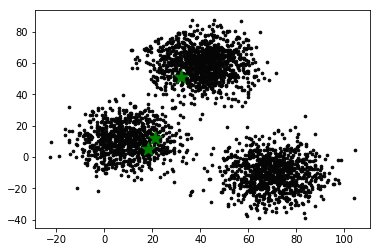

In [24]:
# Plotting along with the Centroids
plt.scatter(value1,value2,c='#050505',s=7)
plt.scatter(C_x,C_y,marker='*',s=200,c='g')
plt.show()

In [25]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster labels (0,1,2)
clusters = np.zeros(len(X))
error = dist(C,C_old,None)
# Loop will run untill the error becomes zero
while error !=0:
    # Asigning each value to its closest clusters
    for i in range(len(X)):
        distances = dist(X[i],C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    C_old = deepcopy(C)
    
    # Find the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        C[i] = np.mean(points,axis=0)
    error= dist(C,C_old,None)

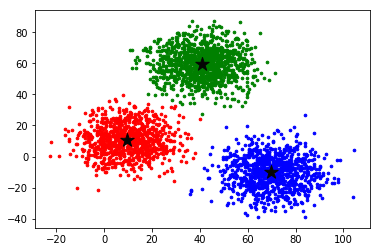

In [27]:
colors = ['r','g','b','y','c','m']
fig,ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j]==i])
    ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
ax.scatter(C[:,0],C[:,1],marker='*',s=200,c='#050505')
plt.show()